In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df_Dp=pd.read_excel("D:\PROJECT\R&D Dept\Prediction Model\Steel Zone\Dephos_Model.xlsx")
df_Dp

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\KALYANMOY MANDAL\AppData\Local\Temp\ipykernel_21064\4047573534.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_Dp=pd.read_excel("D:\PROJECT\R&D Dept\Prediction Model\Steel Zone\Dephos_Model.xlsx")


,production_date,heat_no,ibc,ibp,tsct,tsopt,tsopo,o2b,hmmn,ibm,msg_datetime,dephos_model_val,dephos_actual_val
0,01/01/2024 00:00:00,D955629,0.312126,0.022471,1545.9,1637.5,747,1421,1.01,0.157585,31/12/2023 23:19:35,0.0115,0.0088
1,01/01/2024 00:00:00,F955627,0.694858,0.076099,1614.2,1653.7,462,1509,1.16,0.373078,31/12/2023 23:03:30,0.0178,0.0193
2,01/01/2024 00:00:00,G955626,0.862128,0.094942,1558.3,1659.7,271,2082,1.15,0.253609,31/12/2023 23:06:34,0.0181,0.0167
3,01/01/2024 00:00:00,D955625,0.417887,0.049997,1613.5,1666.3,629,1284,1.02,0.315833,31/12/2023 22:29:28,0.0203,0.0150
4,01/01/2024 00:00:00,E955624,0.446467,0.066961,1605.7,1675.8,518,1261,1.13,0.382586,31/12/2023 22:17:28,0.0226,0.0239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,13/12/2024 00:00:00,D989272,0.212468,0.033258,1622.5,1675.7,864,810,1.03,0.353375,12/12/2024 22:57:20,0.0244,0.0219
26072,13/12/2024 00:00:00,G989262,0.197133,0.043118,1615.6,1677.2,660,1121,1.17,0.294127,12/12/2024 20:47:17,0.0191,0.0241
26073,12/12/2024 00:00:00,G989258,0.229387,0.033242,1601.3,1659.8,720,1024,1.20,0.236445,12/12/2024 19:53:14,0.0183,0.0251
26074,12/12/2024 00:00:00,E989257,0.171443,0.007323,1542.4,1670.8,1214,1440,0.97,0.146053,12/12/2024 19:43:14,0.0182,0.0104


In [116]:
df_Dp=df_Dp.iloc[:,2:13]
df_Dp=df_Dp.drop(["msg_datetime","dephos_model_val"],axis=1)

#Y=df_Dp.iloc[:,-1:]
df_Dp

,ibc,ibp,tsct,tsopt,tsopo,o2b,hmmn,ibm,dephos_actual_val
0,0.312126,0.022471,1545.9,1637.5,747,1421,1.01,0.157585,0.0088
1,0.694858,0.076099,1614.2,1653.7,462,1509,1.16,0.373078,0.0193
2,0.862128,0.094942,1558.3,1659.7,271,2082,1.15,0.253609,0.0167
3,0.417887,0.049997,1613.5,1666.3,629,1284,1.02,0.315833,0.0150
4,0.446467,0.066961,1605.7,1675.8,518,1261,1.13,0.382586,0.0239
...,...,...,...,...,...,...,...,...,...
26071,0.212468,0.033258,1622.5,1675.7,864,810,1.03,0.353375,0.0219
26072,0.197133,0.043118,1615.6,1677.2,660,1121,1.17,0.294127,0.0241
26073,0.229387,0.033242,1601.3,1659.8,720,1024,1.20,0.236445,0.0251
26074,0.171443,0.007323,1542.4,1670.8,1214,1440,0.97,0.146053,0.0104


In [117]:
df_Dp['P_Level'] = df_Dp['dephos_actual_val'].apply(lambda x: 1 if x >= 0.025 else (2 if 0.02 <= x < 0.025 else 0 ))

(df_Dp['P_Level']==1).sum()

2886

In [118]:
import random

def train_test_split_own(df, random_state):
  bad_df=df_Dp[df_Dp['P_Level']==1]
  good_df=df_Dp[df_Dp['P_Level']==0]
  Modarate_df=df_Dp[df_Dp['P_Level']==2]


  train_good_df = good_df.sample(n=12660,random_state = random_state).reset_index(drop = True)
  train_bad_df = bad_df.sample(n=2020,random_state = random_state).reset_index(drop = True)
  train_Mod_df = Modarate_df.sample(n=3570,random_state = random_state).reset_index(drop = True)

  test_good_df = good_df.sample(n=5429,random_state = random_state).reset_index(drop = True)
  test_bad_df = bad_df.sample(n=866,random_state = random_state).reset_index(drop = True)
  test_Mod_df = Modarate_df.sample(n=1531,random_state = random_state).reset_index(drop = True)


  train_df = pd.concat([train_good_df, train_bad_df,train_Mod_df]).sample(frac=1, random_state=random_state).reset_index(drop=True)
  test_df = pd.concat([test_good_df, test_bad_df,test_Mod_df]).sample(frac=1, random_state=random_state).reset_index(drop=True)
    

  return train_df, test_df

train_df, test_df = train_test_split_own(df_Dp, 42)
(test_df["Defact"]==2).sum()

KeyError: 'Defact'

In [ ]:
filtered_test_labels = (train_df[train_df["dephos_actual_val"] > 0.03])
filtered_test_labels

,ibc,ibp,tsct,tsopt,tsopo,o2b,hmmn,ibm,dephos_actual_val,Defact,P_Level
37,0.512428,0.108179,1595.9,1654.6,577,1158,0.850,0.309539,0.0340,1,1
105,0.332962,0.093975,1594.6,1650.0,605,839,1.000,0.338830,0.0353,1,1
113,0.387694,0.109254,1559.8,1651.8,939,1199,0.770,0.234435,0.0317,1,1
116,0.277011,0.119858,1595.8,1660.3,678,914,0.440,0.198363,0.0411,1,1
205,0.223277,0.071960,1631.3,1681.4,974,1205,1.180,0.380785,0.0303,1,1
...,...,...,...,...,...,...,...,...,...,...,...
18152,0.658558,0.080239,1590.7,1666.0,516,1418,0.350,0.135613,0.0305,1,1
18158,0.350699,0.082603,1595.2,1680.0,683,1146,0.760,0.347276,0.0322,1,1
18167,0.707588,0.117056,1587.6,1679.0,872,1594,0.630,0.238316,0.0353,1,1
18195,0.454681,0.074531,1574.4,1652.6,943,1225,1.008,0.256673,0.0305,1,1


In [130]:
x_train=train_df.iloc[:,:-2]
y_train=train_df["dephos_actual_val"]
x_test=test_df.iloc[:,:-2]
y_test=test_df["dephos_actual_val"]

x_test

,ibc,ibp,tsct,tsopt,tsopo,o2b,hmmn,ibm
0,0.437831,0.028386,1536.8,1633.9,675,1353,0.72,0.130630
1,0.446573,0.077691,1640.7,1672.2,498,1067,1.13,0.512407
2,0.737949,0.039289,1550.9,1652.0,428,1458,0.70,0.210986
3,0.432697,0.064357,1596.9,1650.9,567,1085,0.47,0.128173
4,0.100435,0.042832,1608.4,1644.0,623,566,1.23,0.249126
...,...,...,...,...,...,...,...,...
7821,0.318584,0.087739,1626.8,1658.4,500,1368,1.05,0.336675
7822,0.756256,0.043858,1534.0,1649.2,533,1799,1.15,0.215169
7823,0.473863,0.070916,1609.2,1606.7,454,1027,1.02,0.366270
7824,0.177178,0.048457,1595.3,1648.4,575,883,1.31,0.259176


Hyperparameter Tuning  using Grid Search

In [131]:
parameters1 = {'nthread':[-1],
            'booster':['gbtree'],
            'learning_rate': [0.1],
            'gamma': [0],
            'n_estimators': [200],
            'reg_alpha': [0.01],
            'reg_lambda': [5],
            'max_depth': [5] }

In [132]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


xgb_model = xgb.XGBRegressor()  # or XGBClassifier depending on your task
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters1, cv=5, n_jobs=-1, verbose=10)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'nthread': -1, 'reg_alpha': 0.01, 'reg_lambda': 5}


In [133]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Define the XGBoost model
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # # Define the parameter grid for RandomizedSearchCV
# parameters1 = {
#     'n_estimators': range(100, 1001, 10),       # Values from 100 to 1000 with a step of 100
#     'max_depth': range(3, 13, 1),               # Values from 3 to 12 with a step of 1
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Fixed discrete values
#     'gamma': [i/10.0 for i in range(0, 11)],    # Values from 0.0 to 1.0 with a step of 0.1
#     'min_child_weight': range(1, 11, 1),        # Values from 1 to 10 with a step of 1
#     'subsample': [i/10.0 for i in range(6, 11)], # Values from 0.6 to 1.0 with a step of 0.1
#     'colsample_bytree': [i/10.0 for i in range(6, 11)], # Values from 0.6 to 1.0 with a step of 0.1
#     'reg_alpha': [0, 0.01, 0.1, 1, 10, 50],     # Discrete values for L1 regularization
#     'reg_lambda': [1, 5, 10, 20, 50],           # Discrete values for L2 regularization
#     'scale_pos_weight': range(1, 11, 1)         # Values from 1 to 10 with a step of 1
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of random combinations to try
#     scoring='neg_mean_squared_error',  # Change based on your evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=10,
#     n_jobs=-1,  # Use all available CPUs
#     random_state=42
# )

# # Fit RandomizedSearchCV
# random_search.fit(x_train, y_train)

# # Get the best hyperparameters
# best_params = random_search.best_params_
# print("Best hyperparameters:", best_params)

# # Evaluate the model on the test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(x_test)

# # Calculate RMSE or other metrics
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Test RMSE: {rmse:.4f}")


In [134]:
from sklearn.metrics import r2_score

xgb_model_final=XGBRegressor(**best_params)
xgb_model_final.fit(x_train, y_train)
Y_pred_xgb = xgb_model_final.predict(x_test)

r2 = r2_score(y_test, Y_pred_xgb)


#print(type(predictions))
print("R-squared value: {:.2f}".format(r2))
predictions = Y_pred_xgb.ravel()
pred2=pd.DataFrame(Y_pred_xgb, columns=['predicted values'])
#print(pred2)


df11 = pd.DataFrame(Y_pred_xgb,columns=['predicted values'])
# Correct way to access dtype
y_test_df = y_test.to_frame()
df12 = pd.concat([y_test_df, df11], axis=1)

#df12.to_excel("D:\PROJECT\R&D Dept\Prediction Model\Steel Zone\Dephosp_final .xlsx", index=False, header=True)
x_test

R-squared value: 0.73


,ibc,ibp,tsct,tsopt,tsopo,o2b,hmmn,ibm
0,0.437831,0.028386,1536.8,1633.9,675,1353,0.72,0.130630
1,0.446573,0.077691,1640.7,1672.2,498,1067,1.13,0.512407
2,0.737949,0.039289,1550.9,1652.0,428,1458,0.70,0.210986
3,0.432697,0.064357,1596.9,1650.9,567,1085,0.47,0.128173
4,0.100435,0.042832,1608.4,1644.0,623,566,1.23,0.249126
...,...,...,...,...,...,...,...,...
7821,0.318584,0.087739,1626.8,1658.4,500,1368,1.05,0.336675
7822,0.756256,0.043858,1534.0,1649.2,533,1799,1.15,0.215169
7823,0.473863,0.070916,1609.2,1606.7,454,1027,1.02,0.366270
7824,0.177178,0.048457,1595.3,1648.4,575,883,1.31,0.259176


In [135]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, Y_pred_xgb)*100)

13.644790739749435


In [136]:

df12['Accurate_predictions'] = df12.apply(lambda row: 'Y' if (row['predicted values'] - row['dephos_actual_val']) >= -0.003 else 'N', axis=1)
# # Calculate the average accuracy
accuracy_percentage = (df12['Accurate_predictions'].value_counts().get('Y', 0) / len(df12)) * 100
print("Accuracy Percentage: {:.2f}%".format(accuracy_percentage))
########################### Overall MAPE  ##################################



Accuracy Percentage: 86.52%


Model Save in pickle file

In [137]:

import pickle

with open('DePhos_xgb_model_final_case2', 'wb') as file:
    pickle.dump(xgb_model_final,file)

with open('DePhos_xgb_model_final_case2','rb') as file:
    De_phos_pickle = pickle.load(file)


De_phos_pickle.get_booster().feature_names


['ibc', 'ibp', 'tsct', 'tsopt', 'tsopo', 'o2b', 'hmmn', 'ibm']

New Validation Data 

In [138]:
df_Validation=pd.read_excel('D:\\PROJECT\\R&D Dept\\Prediction Model\\Steel Zone\\Dephos Validation Data.xlsx')
df_Validation_Dep=df_Validation.iloc[:,2:10]
df_validation_P_actual=df_Validation.iloc[:,[12]]
prediction = De_phos_pickle.predict(df_Validation_Dep)
# prediction_df=pd.DataFrame(prediction, columns=['Predicted_Values'])



accurecy Check


In [139]:
prediction_df.index=df_validation_P_actual.index 
df_results = pd.DataFrame({
    'predicted': prediction_df["Predicted_Values"],
    'actual': df_validation_P_actual['dephos_actual_val']  # Ensure val_labels is a DataFrame with the column 'dephos_actual_val'
})
# Calculate Avg. Prediction Accuracy
df_results['Accurate_predictions'] = df_results.apply(lambda row: 'Y' if (row['predicted'] - row['actual']) >= -0.003 else 'N', axis=1)
# # Calculate the average accuracy
accuracy_percentage = (df_results['Accurate_predictions'].value_counts().get('Y', 0) / len(df_results)) * 100
print("Accuracy Percentage: {:.2f}%".format(accuracy_percentage))
########################### Overall MAPE  ##################################
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(df_validation_P_actual, prediction)*100)


Accuracy Percentage: 79.44%
13.75022213730405


Plotting Data


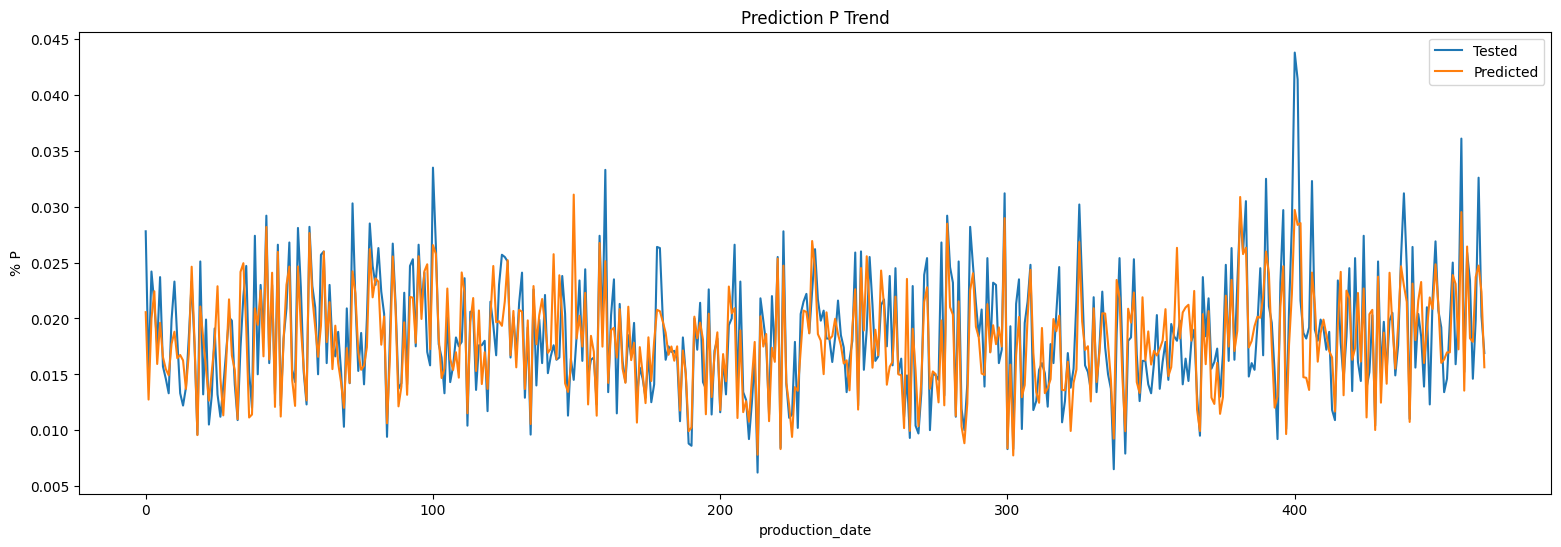

In [ ]:
#Plot Prediction Trend

x_axis = range(len(df_validation_P_actual))
plt.figure(figsize=(19, 6))
plt.plot(x_axis, df_validation_P_actual, label="Tested")
plt.plot(x_axis, prediction, label="Predicted")
plt.legend()
plt.xlabel("Production_date")
plt.ylabel('% P')
plt.title('Prediction P Trend')
##plt.ylim(70, 80)
plt.savefig("prediction trend.png", bbox_inches='tight')
plt.show()